<a href="https://colab.research.google.com/github/MGhassen30798/Insight/blob/Prediction-from-retina-pic-server/visualisation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get csv file

In [ ]:
df_new= pd.read_csv("/content/drive/MyDrive/PIM/gh/data/full_df_cleaned.csv")
df_old= pd.read_csv("/content/drive/MyDrive/PIM/gh/data/full_df.csv")

In [ ]:
df_old = pd.read_csv('/content/drive/MyDrive/PIM/gh/data/full_df.csv')


In [ ]:
df_old = pd.read_csv('/content/drive/MyDrive/PIM/gh/data/full_df_cleaned.csv')


In [ ]:
df_old.head()

Diagnostic         file  \
0                           normal fundus  0_right.jpg   
1                           normal fundus  1_right.jpg   
2  moderate non proliferative retinopathy  2_right.jpg   
3       mild nonproliferative retinopathy  4_right.jpg   
4  moderate non proliferative retinopathy  5_right.jpg   

                target_init  Patient Age Patient Sex  \
0  [1, 0, 0, 0, 0, 0, 0, 0]           69      Female   
1  [1, 0, 0, 0, 0, 0, 0, 0]           57        Male   
2  [0, 1, 0, 0, 0, 0, 0, 0]           42        Male   
3  [0, 1, 0, 0, 0, 0, 0, 0]           53        Male   
4  [0, 1, 0, 0, 0, 0, 0, 0]           50      Female   

                     Target tarstr  N  D  G  C  A  H  M  O  \
0  [1, 0, 0, 0, 0, 0, 0, 0]      N  1  0  0  0  0  0  0  0   
1  [1, 0, 0, 0, 0, 0, 0, 0]      N  1  0  0  0  0  0  0  0   
2  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
3  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
4  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   

                  filename  
0  0_right_69_Female_N.jpg  
1    1_right_57_Male_N.jpg  
2    2_right_42_Male_D.jpg  
3    4_right_53_Male_D.jpg  
4  5_right_50_Female_D.jpg

In [ ]:
df_new.head()

Diagnostic         file  \
0                           normal fundus  0_right.jpg   
1                           normal fundus  1_right.jpg   
2  moderate non proliferative retinopathy  2_right.jpg   
3       mild nonproliferative retinopathy  4_right.jpg   
4  moderate non proliferative retinopathy  5_right.jpg   

                target_init  Patient Age Patient Sex  \
0  [1, 0, 0, 0, 0, 0, 0, 0]           69      Female   
1  [1, 0, 0, 0, 0, 0, 0, 0]           57        Male   
2  [0, 1, 0, 0, 0, 0, 0, 0]           42        Male   
3  [0, 1, 0, 0, 0, 0, 0, 0]           53        Male   
4  [0, 1, 0, 0, 0, 0, 0, 0]           50      Female   

                     Target tarstr  N  D  G  C  A  H  M  O  \
0  [1, 0, 0, 0, 0, 0, 0, 0]      N  1  0  0  0  0  0  0  0   
1  [1, 0, 0, 0, 0, 0, 0, 0]      N  1  0  0  0  0  0  0  0   
2  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
3  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   
4  [0, 1, 0, 0, 0, 0, 0, 0]      D  0  1  0  0  0  0  0  0   

                  filename  
0  0_right_69_Female_N.jpg  
1    1_right_57_Male_N.jpg  
2    2_right_42_Male_D.jpg  
3    4_right_53_Male_D.jpg  
4  5_right_50_Female_D.jpg

# Compared old and cleaned data

Text(0.5, 1.0, 'Old DataFrame')

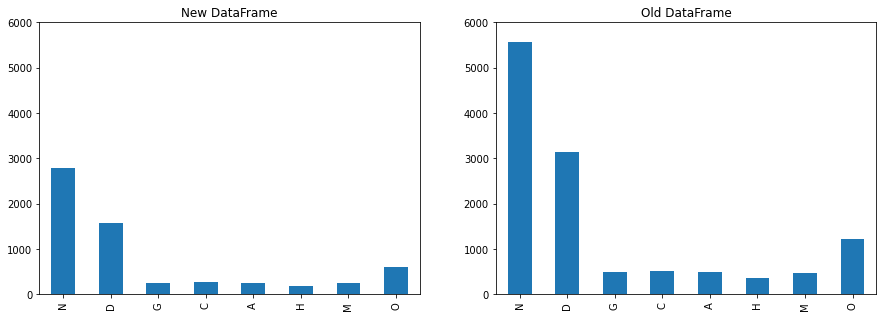

In [ ]:
list_names =['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
maladies = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia', 'Other']

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df_new[list_names].sum().plot(kind = 'bar')
plt.ylim((0,6000))
plt.title('New DataFrame')

plt.subplot(1,2,2)
tmp = df_old[list_names].sum()*2
tmp.plot(kind = 'bar')
plt.ylim((0,6000))
plt.title('Old DataFrame')



# Age distribution

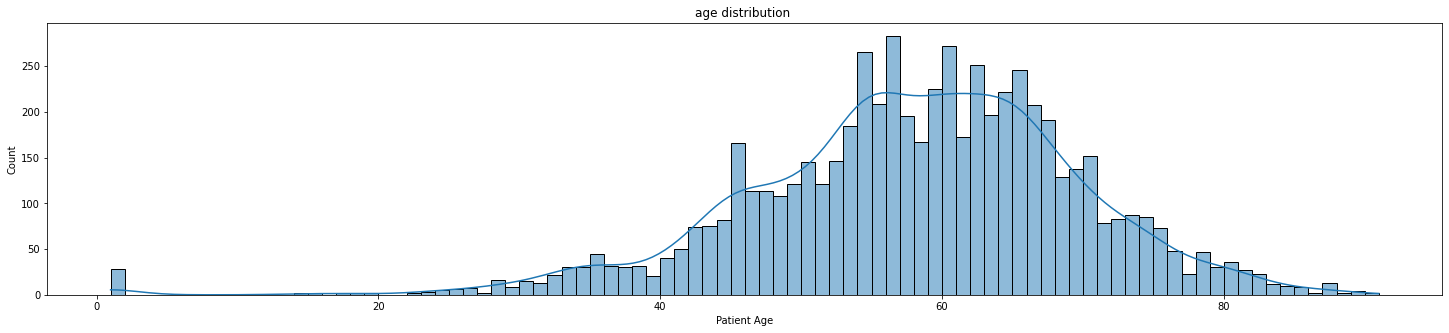

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(25,5))
sns.histplot(ax=ax1, x="Patient Age", data=df_new, kde=True, bins=90)
ax1.set_title("age distribution ")
plt.show()

## Disease distribution according to Age

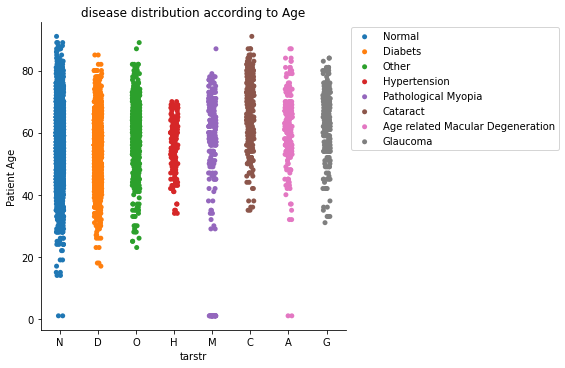

In [ ]:
sns.catplot(x='tarstr', y='Patient Age', data=df_new)
plt.title("disease distribution according to Age")
plt.legend(bbox_to_anchor=(1,1), labels=['Normal', 'Diabets', 'Other', 'Hypertension', 'Pathological Myopia', 'Cataract', 'Age related Macular Degeneration', 'Glaucoma'])
    
plt.show()

# Gender distribution

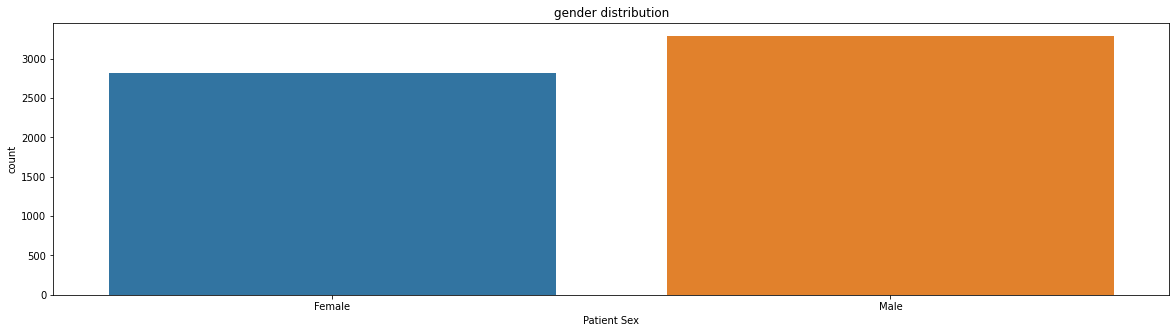

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(20,5))
sns.countplot(ax=ax1, x="Patient Sex", data=df_new)
ax1.set_title("gender distribution")
plt.show()

## Number and percentage of each sex

In [ ]:
for i in range(len(list_names)):
    sns.set_style("darkgrid")
    fig= plt.subplots(figsize=(20,5))
    sns.countplot(x='Patient Sex', hue=list_names[i], data=df_new)
    plt.title(f"Diagnostics {maladies[i]} grouped by gender")
    plt.show()

In [ ]:
df_femme = df_new.loc[(df_new['Patient Sex']=='Female')].reset_index()

In [ ]:
df_homme = df_new.loc[(df_new['Patient Sex']=='Male')].reset_index()

In [ ]:
def plot_count(feature, title, df_new, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df_new))
    if show_all:
        g = sns.countplot(df_new[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(df_new[feature], order = df_new[feature].value_counts().index[:20], palette='Set3')
        if(size > 2):
            plt.xticks(rotation=0, size=10)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Number and percentage of {}".format(title))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


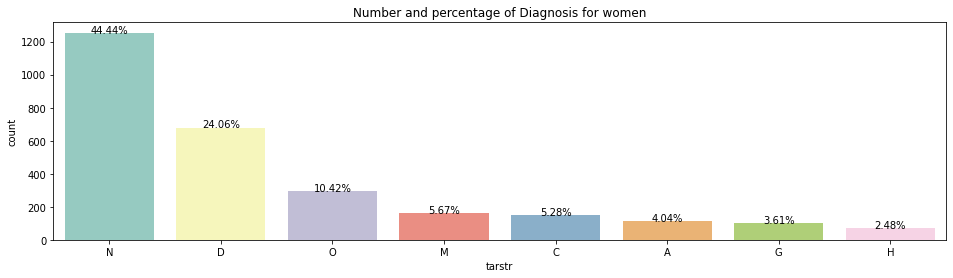

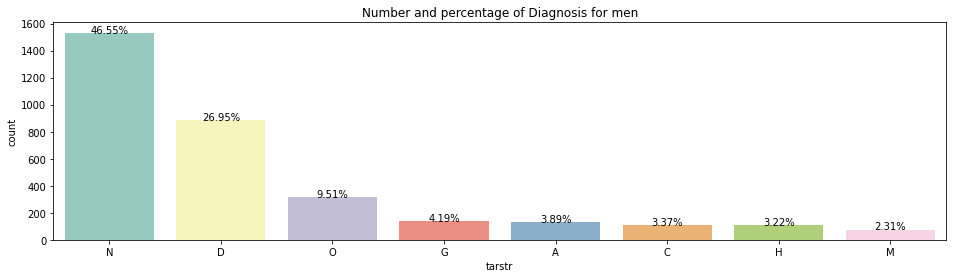

In [ ]:
plot_count("tarstr", "Diagnosis for women", df_femme, size=4)
plot_count("tarstr", "Diagnosis for men", df_homme, size=4)

plt.show()   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


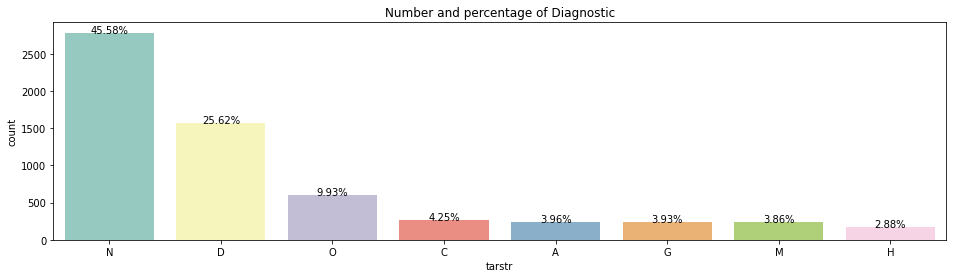

In [ ]:
plot_count("tarstr", "Diagnostic", df_new, size=4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


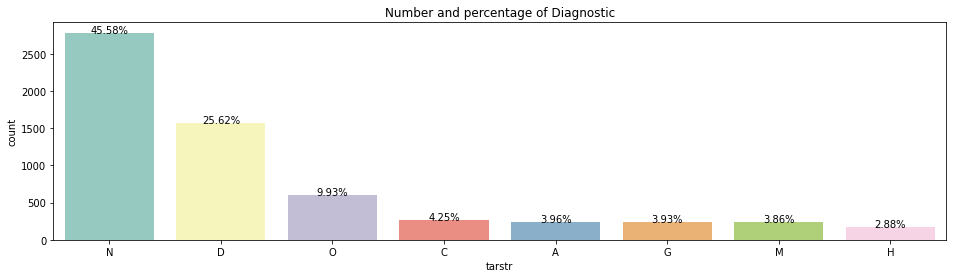

In [ ]:
plot_count("tarstr", "Diagnostic", df_new, size=4)

# Sample of each diseases 

In [ ]:
labels = ['Normal', 'Diabets', 'Other', 'Cataract', 'Age related Macular Degeneration', 'Glaucoma', 'Pathological Myopia', 'Diabetes, Hypertension']
fig = plt.figure(figsize =(10, 7)) 
plt.pie(counts, labels = labels, autopct='%1.1f%%')
plt.title('Distribution de diagnostiques dans la population')
plt.show()

TypeError: ignored

<Figure size 720x504 with 0 Axes>

In [ ]:
df_n = df_new.loc[(df_new.N==1)].sample(9).reset_index()
df_d = df_new.loc[(df_new.D==1)].sample(9).reset_index()
df_g = df_new.loc[(df_new.G==1)].sample(9).reset_index()
df_c = df_new.loc[(df_new.C==1)].sample(9).reset_index()
df_a = df_new.loc[(df_new.A==1)].sample(9).reset_index()
df_h = df_new.loc[(df_new.H==1)].sample(9).reset_index()
df_m = df_new.loc[(df_new.M==1)].sample(9).reset_index()
df_o = df_new.loc[(df_new.O==1)].sample(9).reset_index()

df_exemples = [df_n, df_d, df_g, df_c, df_a, df_h, df_m, df_o]

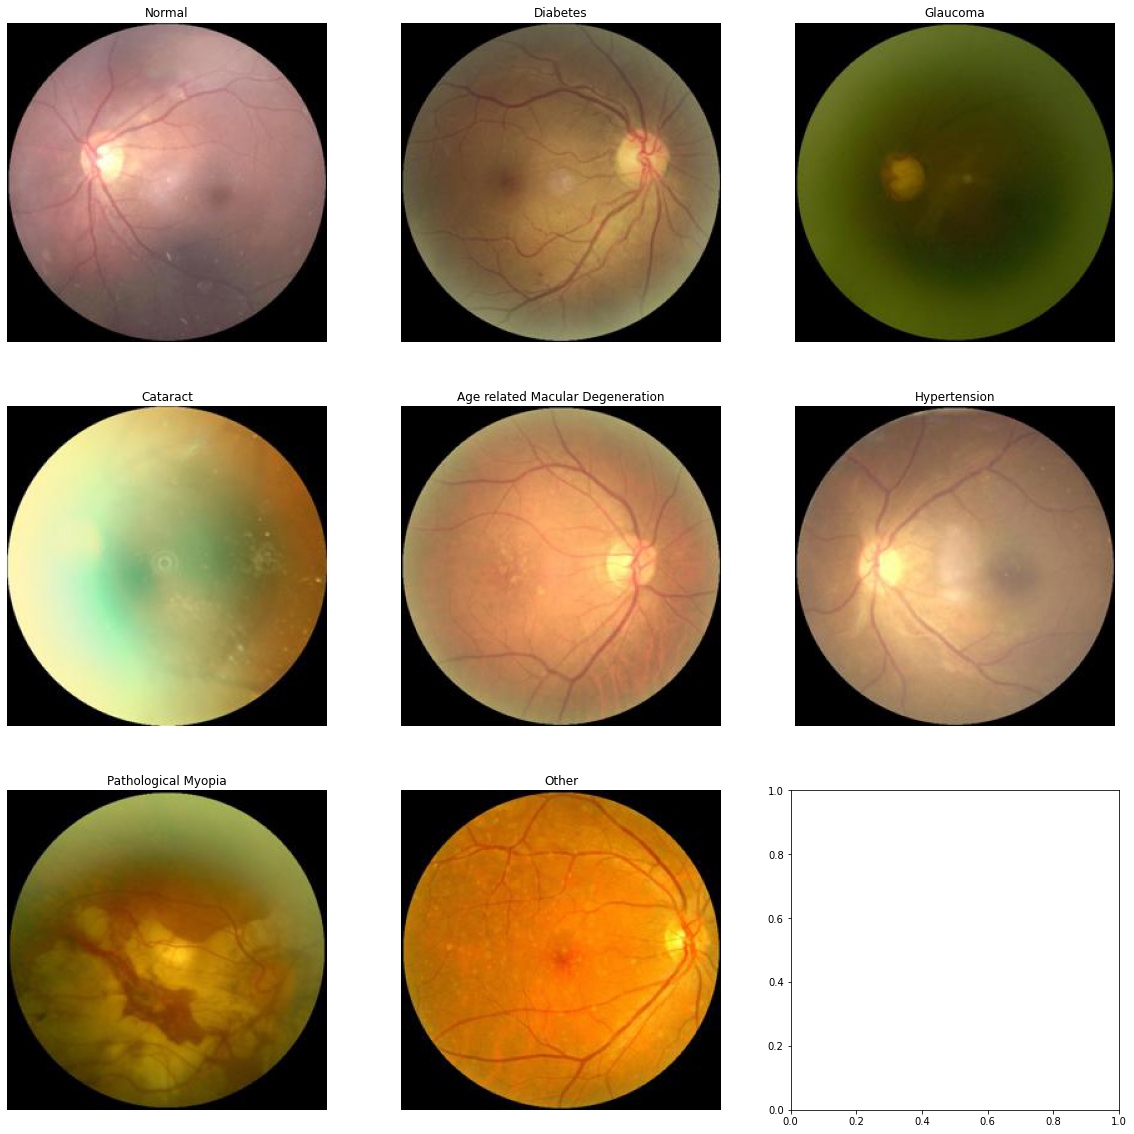

In [ ]:
import os
import imageio
IMAGE_PATH = '/content/drive/My Drive/PIM/gh/data/preprocessed_images2'
eye_exam="filename"
f, ax = plt.subplots(3,3, figsize=(20,20))

for i, j, k in zip(range(len(df_exemples)), df_exemples, maladies):
    dd = j.iloc[0]
    image_name = dd[eye_exam]
    image_path = os.path.join(IMAGE_PATH, image_name)
    img_data=imageio.imread(image_path)
    ax[i//3, i%3].imshow(img_data)
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title(k)

In [ ]:
IMAGE_PATH = "/content/drive/My Drive/PIM/gh/data/preprocessed_images"
def show_images(df, title="Diagnosys", eye_exam="file"):
    print(f"Exemples of eyes diagnostic with {title} : \n")
    f, ax = plt.subplots(3,3, figsize=(16,16))
    for i,idx in enumerate(df.index):
        dd = df.iloc[idx]
        image_name = dd[eye_exam]
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data=imageio.imread(image_path)
        ax[i//3, i%3].imshow(img_data)
        ax[i//3, i%3].axis('off')
    plt.show()

Exemples of eyes diagnostic with Normal : 



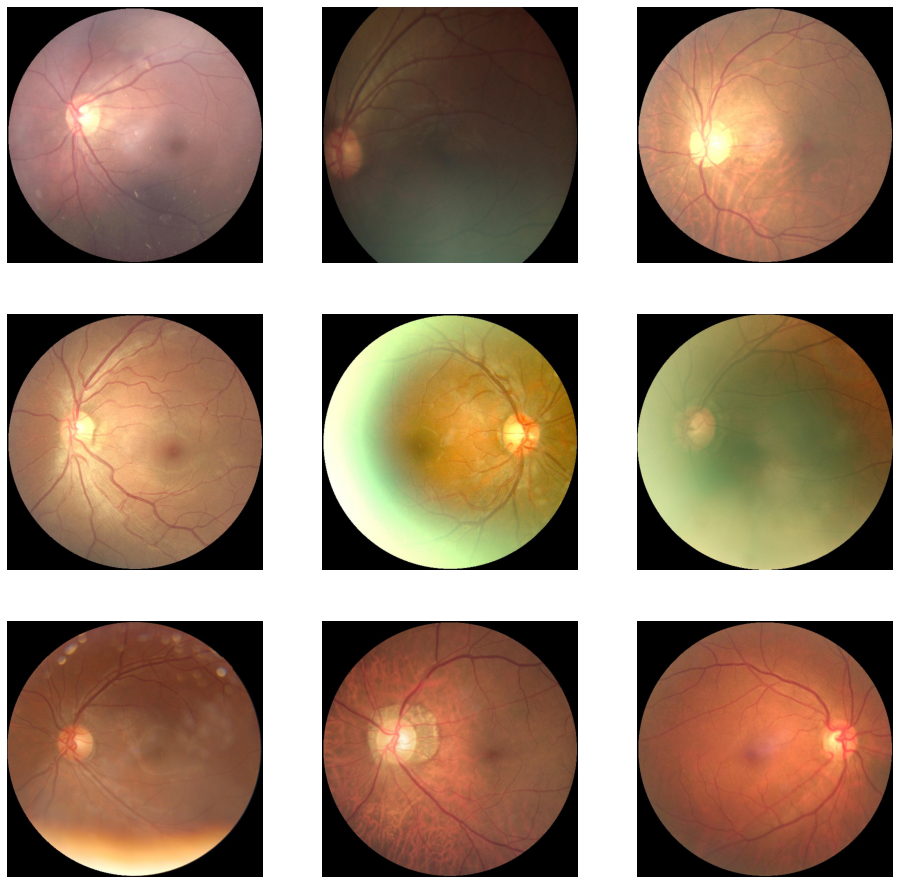

Exemples of eyes diagnostic with Diabetes : 



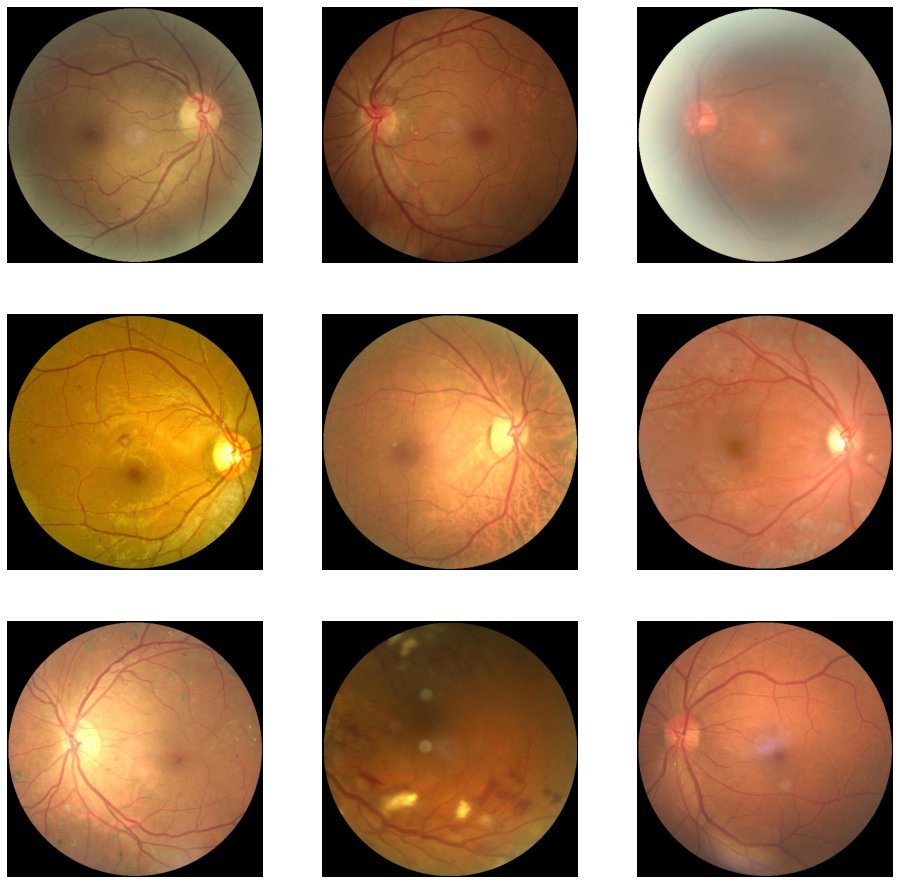

Exemples of eyes diagnostic with Glaucoma : 



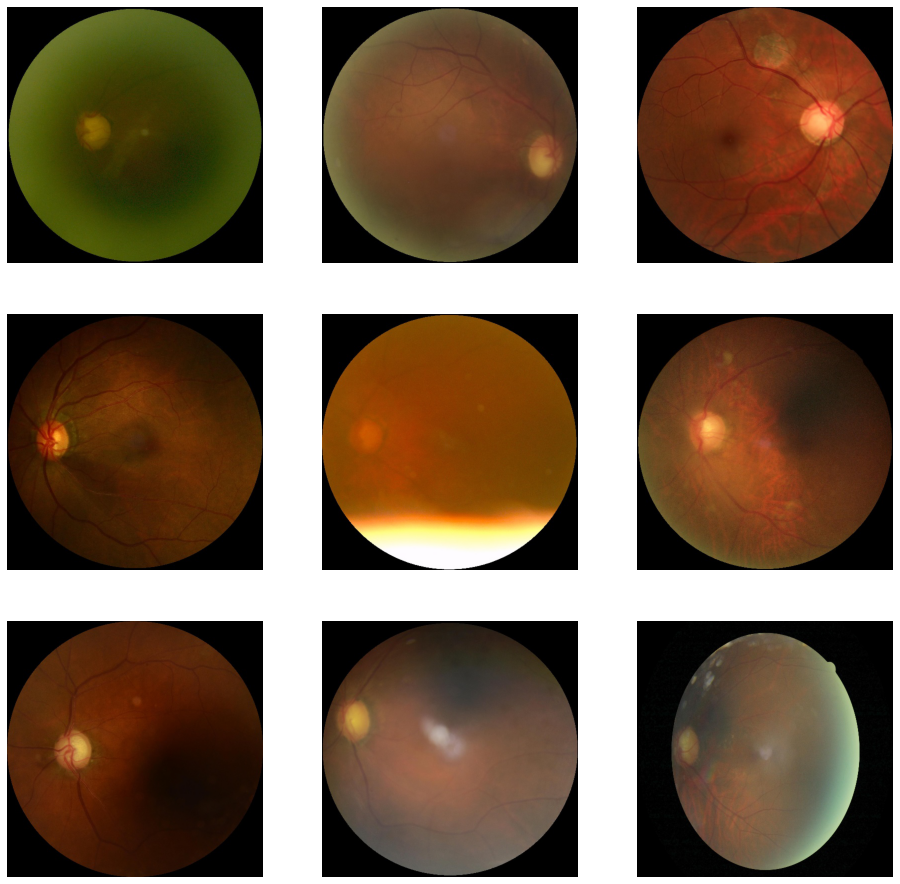

Exemples of eyes diagnostic with Cataract : 



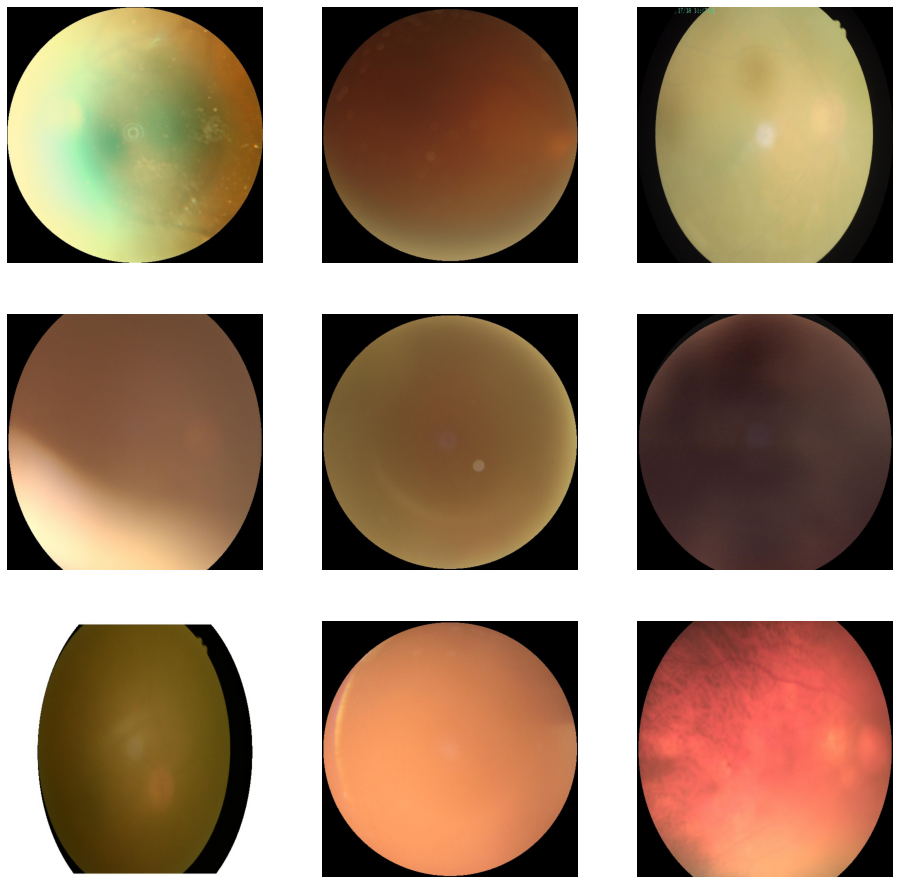

Exemples of eyes diagnostic with Age related Macular Degeneration : 



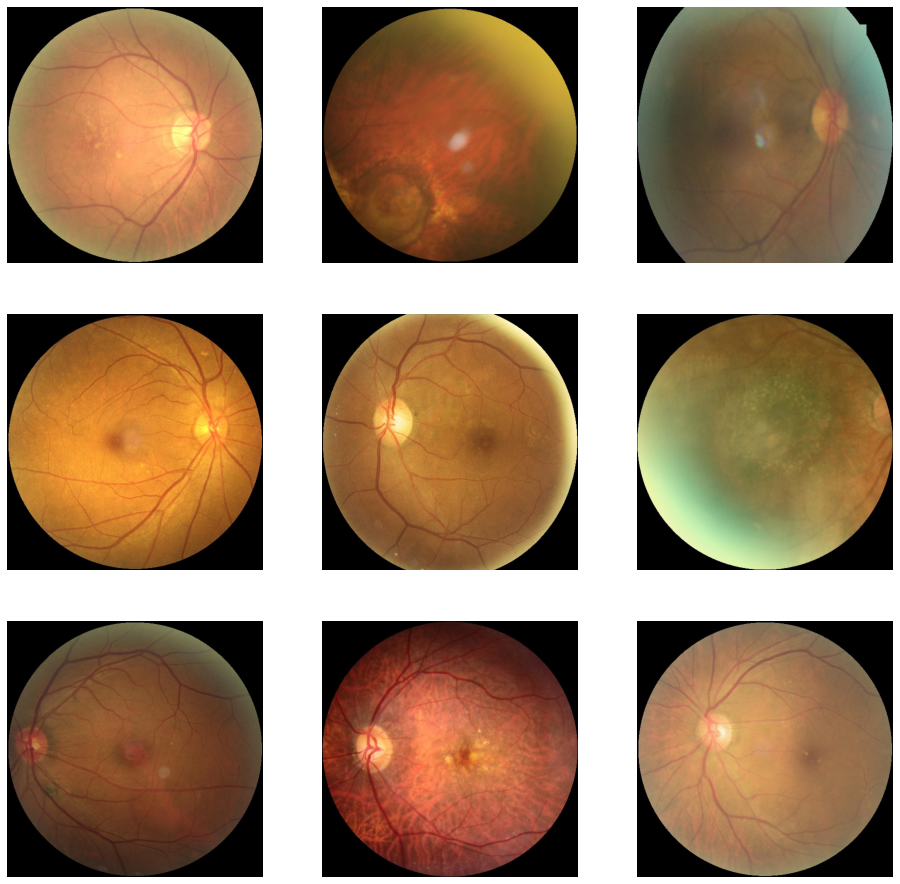

Exemples of eyes diagnostic with Hypertension : 



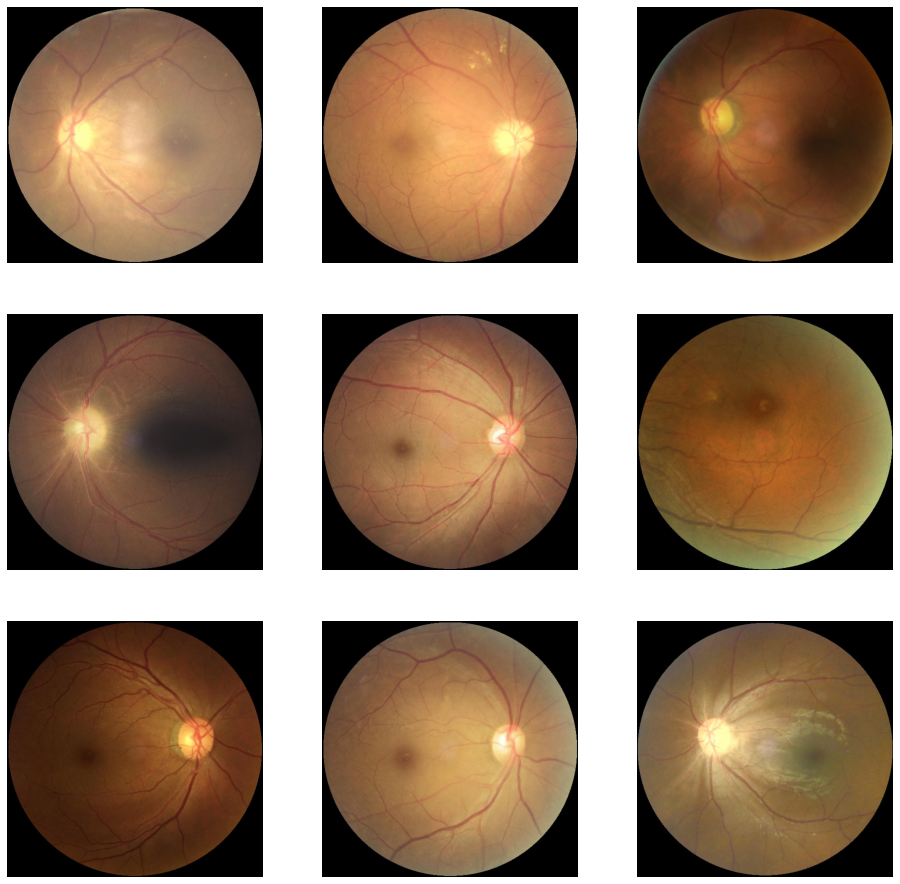

Exemples of eyes diagnostic with Pathological Myopia : 



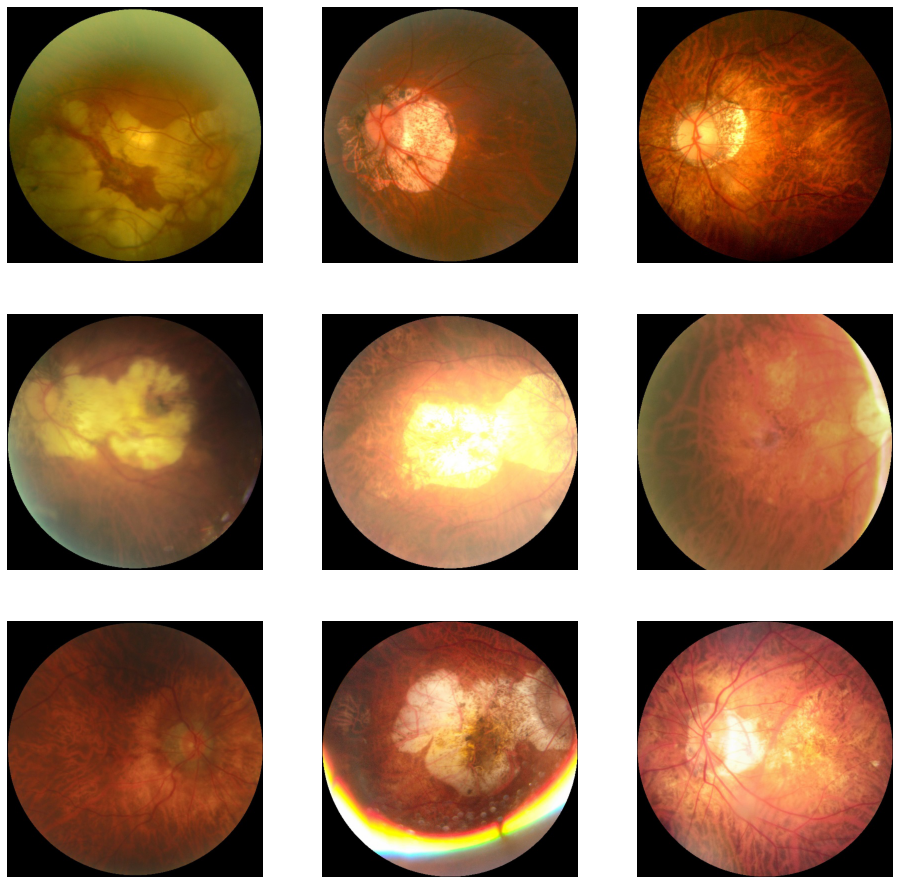

Exemples of eyes diagnostic with Other : 



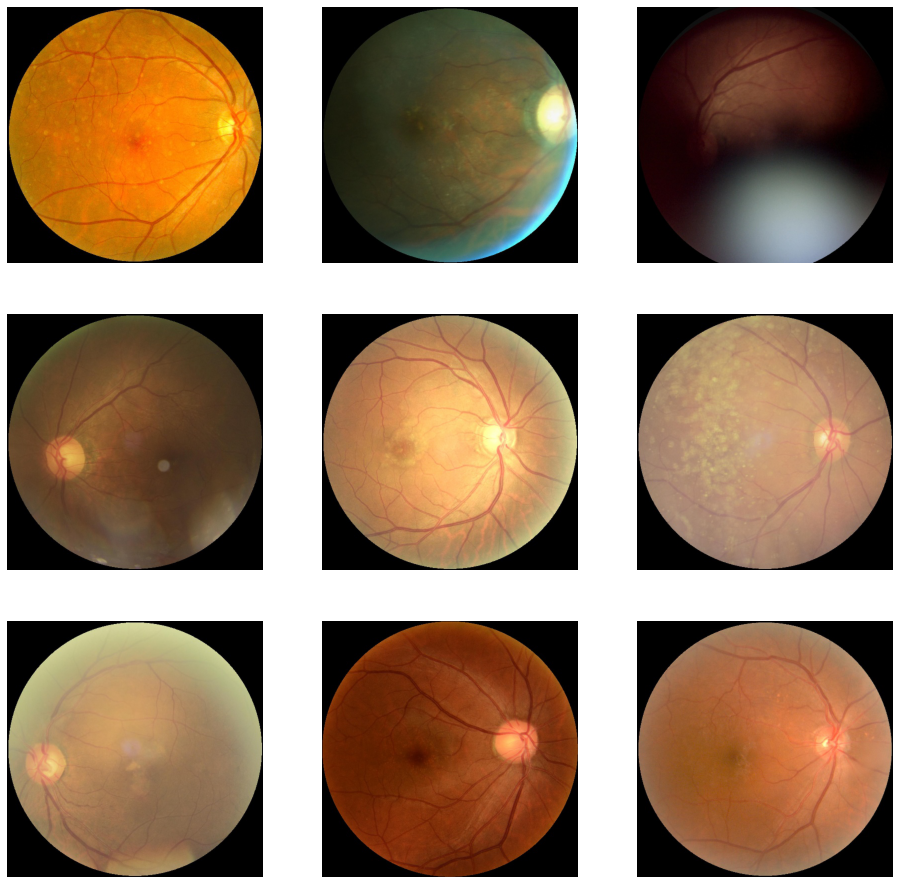

In [ ]:
for i, j in zip(df_exemples, maladies):
    show_images(i, title=j, eye_exam="file")